In [1]:
#Loads some parameters
import CloudDataset
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
batch_size = 5

#imports state of the art model.
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50')
print("Load successfull")


Using cache found in C:\Users\Anton/.cache\torch\hub\pytorch_vision_v0.10.0


Load successfull


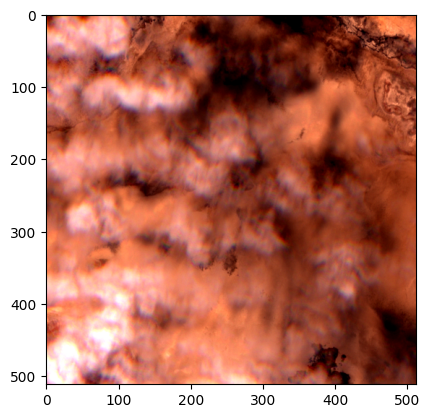

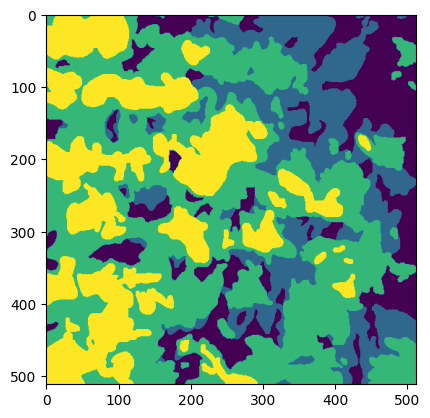

In [18]:
# Get the dataset of the CloudDataset
dataset = CloudDataset.CloudDataset("data\\train")

# Creates validation/training dataset with 20/80 split
validation_dataset, training_dataset = torch.utils.data.random_split(dataset,[0.2, 0.8])

# Create a DataLoaders from the datasets.
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)

# Creates an iterator and plots the pictures
it = iter(training_loader)
images, labels = next(it)

plt.figure()
plt.imshow(images[0])
plt.show()

plt.figure()
plt.imshow(labels[0])
plt.show()

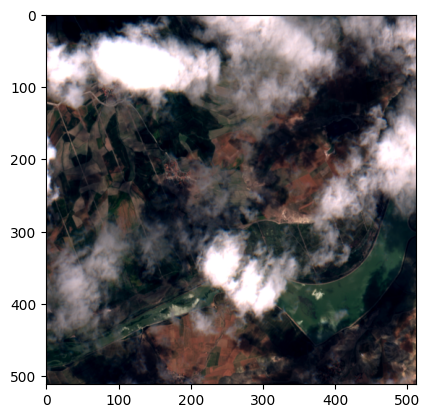

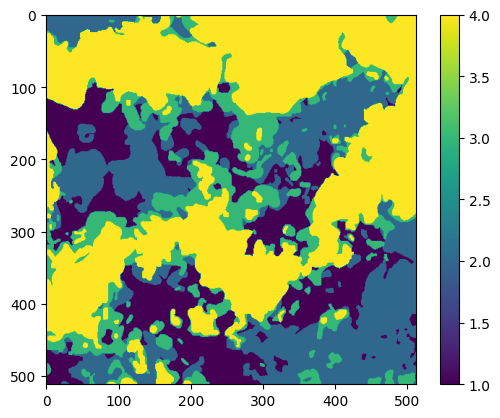

In [25]:
# Grabs next bath of pictures and displays the first, run multiple times for different plots
images, labels = next(it)

plt.figure()
plt.imshow(images[0])
plt.show()

plt.figure()
img = plt.imshow(labels[0])
plt.colorbar(img)
plt.show()

In [4]:
#Verifies that model works
model.eval()

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [26]:
print(np.shape(images))
print(np.shape(labels))
print(np.shape(images.permute(0, 3, 1, 2)))

torch.Size([5, 512, 512, 3])
torch.Size([5, 512, 512])
torch.Size([5, 3, 512, 512])


In [11]:
images=images.permute(0, 3, 1, 2)
preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

im = preprocess(images)




In [30]:
print(np.shape(images))
print(torch.mean(images,(0,2,3)))
print(torch.mean(im,(0,2,3)))
print(torch.std(images,(0,2,3)))
print(torch.std(im,(0,2,3)))

torch.Size([5, 3, 512, 512])
tensor([0.2020, 0.3788, 0.5026])
tensor([-1.2356, -0.3444,  0.4295])
tensor([0.2453, 0.2424, 0.2997])
tensor([1.0712, 1.0822, 1.3320])
